In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import glob
import os
import cv2

In [2]:
# FFT and Filtering parameters
band_freq_min=400
band_freq_max=22000
windowlength=1024 # also equals to NFFT
N_overlap=400 # Overlap length in STFT 

Read the first data, to get Spectrogram dimensions

In [3]:
source_path='../data/train_data/audio/'
dest_path = '../data/train_data/spec/'

In [4]:
source_dir = source_path + '0/' #Choose 0 for negative, 1 for positive

In [5]:
wav_files = os.listdir(source_dir)

In [6]:
for audioFile in wav_files:
    audio_path = os.path.join(source_dir,audioFile)
    (sig, rate) = librosa.load(audio_path, sr=None, mono=True)
    f, t, Syy = signal.stft(sig,fs=rate,window='hann',noverlap=N_overlap,nfft=windowlength,nperseg=windowlength)
    Syy=abs(Syy) * 33 #apply amplification
    Syy=20*np.log10(Syy/0.00002)
    Syy[Syy<0.0] = 0.0
    Syy = Syy / Syy.max() #normalize to [0, 1]
    Syy *= 255
    Syy_3d = np.stack([Syy] * 3, axis=-1)
    
    Syy_3d = cv2.flip(Syy_3d, 0)
    Syy_3d = cv2.resize(Syy_3d, (224, 224))
    img_path = audio_path.replace("audio", "spec").replace("wav","png")
    cv2.imwrite(img_path, cv2.cvtColor(Syy_3d, cv2.COLOR_RGB2BGR))
    

C:\Users\dgnhk\AppData\Local\Temp\ipykernel_9448\1095523807.py:6: RuntimeWarning: divide by zero encountered in log10
  Syy=20*np.log10(Syy/0.00002)
C:\Users\dgnhk\AppData\Local\Temp\ipykernel_9448\1095523807.py:8: RuntimeWarning: invalid value encountered in divide
  Syy = Syy / Syy.max() #normalize to [0, 1]


Flatten Spectrogram training data and write to csv file

Text(0.5, 0, 'Time [sec]')

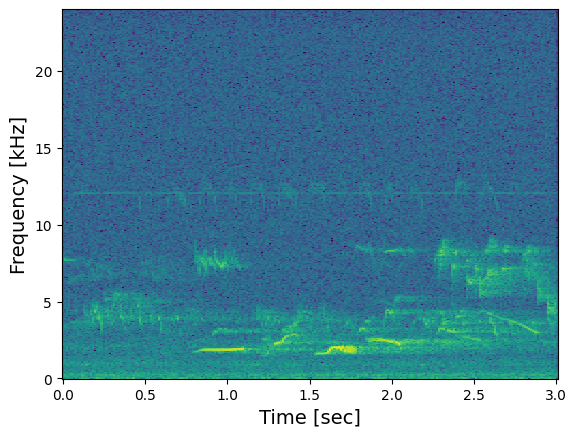

In [7]:
plt.pcolormesh(t[:],f[:]/1e3,Syy[:,:])
plt.ylabel('Frequency [kHz]', fontsize=14)
plt.xlabel('Time [sec]',fontsize=14)